In [1]:
# ------------------------------------------
# Three-dimensional Fu-Kane-Mele model
# Fu, Kane and Mele, PRL 98, 106803 (2007)
# ------------------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# set model parameters
t=1.0      # spin-independent first-neighbor hop
dt=0.4     # modification to t for (111) bond
soc=0.125  # spin-dependent second-neighbor hop

In [3]:
def set_model(t,dt,soc):

  # set up Fu-Kane-Mele model
  lat=[[.0,.5,.5],[.5,.0,.5],[.5,.5,.0]]
  orb=[[0.,0.,0.],[.25,.25,.25]]
  model=tb_model(3,3,lat,orb,nspin=2)

  # spin-independent first-neighbor hops
  for lvec in ([0,0,0],[-1,0,0],[0,-1,0],[0,0,-1]):
    model.set_hop(t,0,1,lvec)
  model.set_hop(dt,0,1,[0,0,0],mode="add")

  # spin-dependent second-neighbor hops
  lvec_list=([1,0,0],[0,1,0],[0,0,1],[-1,1,0],[0,-1,1],[1,0,-1])
  dir_list=([0,1,-1],[-1,0,1],[1,-1,0],[1,1,0],[0,1,1],[1,0,1])
  for j in range(6):
    spin=np.array([0.]+dir_list[j])
    model.set_hop( 1.j*soc*spin,0,0,lvec_list[j])
    model.set_hop(-1.j*soc*spin,1,1,lvec_list[j])

  return model

In [4]:
my_model=set_model(t,dt,soc)
my_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 2
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 4
lattice vectors:
 #  0  ===>  [     0.0 ,     0.5 ,     0.5 ]
 #  1  ===>  [     0.5 ,     0.0 ,     0.5 ]
 #  2  ===>  [     0.5 ,     0.5 ,     0.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [    0.25 ,    0.25 ,    0.25 ]
site energies:
 #  0  ===>   [[0.+0.j 0.+0.j]  [0.+0.j 0.+0.j]]
 #  1  ===>   [[0.+0.j 0.+0.j]  [0.+0.j 0.+0.j]]
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>  [[1.4+0.j 0. +0.j]  [0. +0.j 1.4+0.j]]
<  0 | H |  1 + [ -1 ,  0 ,  0 ] >     ===>  [[1.+0.j 0.+0.j]  [0.+0.j 1.+0.j]]
<  0 | H |  1 + [  0 , -1 ,  0 ] >     ===>  [[1.+0.j 0.+0.j]  [0.+0.j 1.+0.j]]
<  0 | H |  1 + [  0 ,  0 , -1 ] >     ===>  [[1.+0.j 0.+0

In [5]:
# construct path in k-space and solve model
path=[[0.,0.,0.],[0.,.5,.5],[0.25,.625,.625],
         [.5,.5,.5],[.75,.375,.375],[.5,0.,0.]]
label=(r'$\Gamma$',r'$X$',r'$U$',r'$L$',r'$K$',r'$L^\prime$')
(k_vec,k_dist,k_node)=my_model.k_path(path,101)

----- k_path report begin ----------
real-space lattice vectors
 [[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
k-space metric tensor
 [[ 3. -1. -1.]
 [-1.  3. -1.]
 [-1. -1.  3.]]
internal coordinates of nodes
 [[0.    0.    0.   ]
 [0.    0.5   0.5  ]
 [0.25  0.625 0.625]
 [0.5   0.5   0.5  ]
 [0.75  0.375 0.375]
 [0.5   0.    0.   ]]
reciprocal-space lattice vectors
 [[-1.  1.  1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]]
cartesian coordinates of nodes
 [[ 0.    0.    0.  ]
 [ 1.    0.    0.  ]
 [ 1.    0.25  0.25]
 [ 0.5   0.5   0.5 ]
 [ 0.    0.75  0.75]
 [-0.5   0.5   0.5 ]]
list of segments:
  length =     1.0  from  [0. 0. 0.]  to  [0.  0.5 0.5]
  length = 0.35355  from  [0.  0.5 0.5]  to  [0.25  0.625 0.625]
  length = 0.61237  from  [0.25  0.625 0.625]  to  [0.5 0.5 0.5]
  length = 0.61237  from  [0.5 0.5 0.5]  to  [0.75  0.375 0.375]
  length = 0.61237  from  [0.75  0.375 0.375]  to  [0.5 0.  0. ]
node distance list: [0.      1.      1.35355 1.96593 2.5783  3.19067]
node index list:   

In [6]:
evals=my_model.solve_all(k_vec)

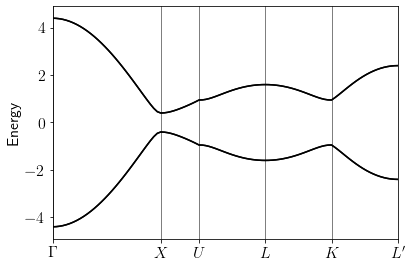

In [7]:
# ------------------------------------
# first plot: compute band structure
# ------------------------------------

# band structure plot
fig, ax = plt.subplots(1,1,figsize=(6.,4.))
ax.set_xlim([0,k_node[-1]])
ax.set_xticks(k_node)
ax.set_xticklabels(label)
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
ax.set_ylabel("Energy")
ax.set_ylim(-4.9,4.9)
for n in range(4):
  ax.plot(k_dist,evals[n],color='k')
fig.tight_layout()
#fig.savefig("fkm_bsr.pdf")

plt.show()

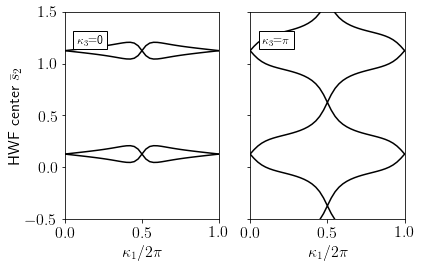

In [8]:
# --------------------------------------
# second plot: compute Wannier flow
# -------------------------------------

# initialize plot
fig, ax = plt.subplots(1,2,figsize=(6,4),sharey=True)

# Obtain eigenvectors on 2D grid on slices at fixed kappa_3
# Note physical (kappa_1,kappa_2,kappa_3) have python indices (0,1,2)
kappa2_values=[0.,0.5]
labs=[r'$\kappa_3$=0',r'$\kappa_3$=$\pi$']
nk=41
dk=1./float(nk-1)
wf=wf_array(my_model,[nk,nk])

#loop over slices
for j in range(2):
  for k0 in range(nk):
    for k1 in range(nk):
      kvec=[k0*dk,k1*dk,kappa2_values[j]]
      (eval,evec)=my_model.solve_one(kvec,eig_vectors=True)
      wf[k0,k1]=evec
  wf.impose_pbc(mesh_dir=0,k_dir=0)
  wf.impose_pbc(mesh_dir=1,k_dir=1)
  hwfc=wf.berry_phase([0,1],dir=1,contin=True,berry_evals=True)/(2.*np.pi)
  
  ax[j].set_xlim([0.,1.])
  ax[j].set_xticks([0.,0.5,1.])
  ax[j].set_xlabel(r"$\kappa_1/2\pi$")
  ax[j].set_ylim(-0.5,1.5)
  for n in range(2):
    for shift in [-1.,0.,1.]:
      ax[j].plot(np.linspace(0.,1.,nk),hwfc[:,n]+shift,color='k')
  ax[j].text(0.08,1.20,labs[j],size=12.,bbox=dict(facecolor='w',edgecolor='k'))

ax[0].set_ylabel(r"HWF center $\bar{s}_2$")
fig.tight_layout()
plt.subplots_adjust(left=0.15,wspace=0.2)
#fig.savefig("fkm_topo.pdf")

plt.show()